In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/Bengaluru_House_Data.csv'
df = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pandas revision

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.shape

(13320, 9)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.dropna(subset=["society","size","location"])

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [ ]:

df.dropna(subset=["society","size","location"],inplace = True)
x_bath = df["bath"].mean()
df.fillna({"bath":x_bath},inplace=True)
df.isnull().sum()
x_balcony = df["balcony"].mean()
df.fillna({"balcony":x_balcony},inplace=True)
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:

def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.isnull().sum()
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.000000,120.00
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.000000,95.00
3,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.000000,38.00
4,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,1.629936,204.00


In [ ]:
df["location"].count()

np.int64(7433)

In [ ]:
df.groupby("location")["price"].mean()

,price
location,
Banaswadi,35.000000
Bhoganhalli,22.890000
Devarabeesana Halli,152.250000
Devarachikkanahalli,54.000000
Electronic City,23.250000
...,...
Yelahanka New Town,47.285714
Yelenahalli,49.000000
Yemlur,1605.833333


In [ ]:
mean_prices_by_location = df.groupby("location")["price"].mean()
location_with_max_price = mean_prices_by_location.idxmax()
max_avg_price = mean_prices_by_location.max()

print(f"Location with maximum average price: {location_with_max_price}")
print(f"Maximum average price: {max_avg_price}")


Location with maximum average price: Yemlur
Maximum average price: 1605.8333333333333


In [ ]:
numeric_df = df[["total_sqft","bath","balcony","price"]]
numeric_df.corr()

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.619359,0.190794,0.701371
bath,0.619359,1.000000,0.247484,0.585302
balcony,0.190794,0.247484,1.000000,0.149293
price,0.701371,0.585302,0.149293,1.000000


yes,the correlation between total_sqft and price is 0.7 therefore 70%of larger houses have larger price

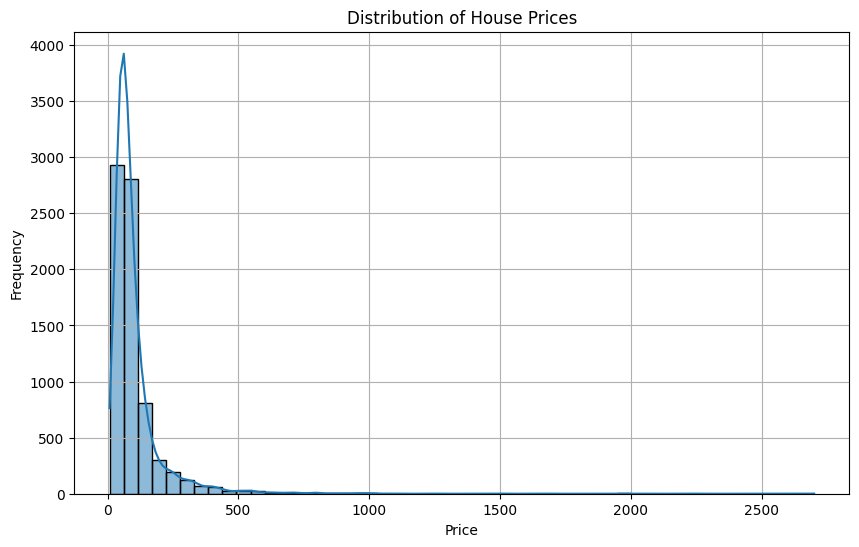

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

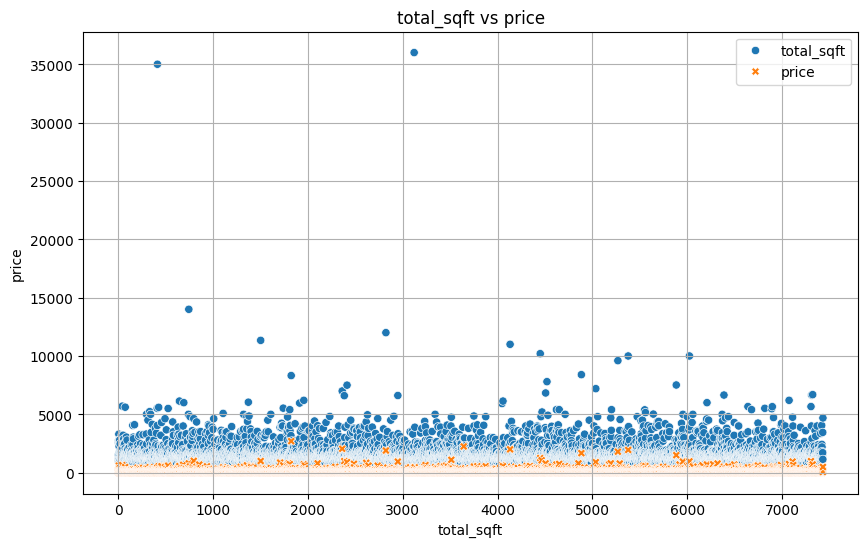

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot([df["total_sqft"],df['price']])
plt.title('total_sqft vs price')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.grid(True)
plt.show()

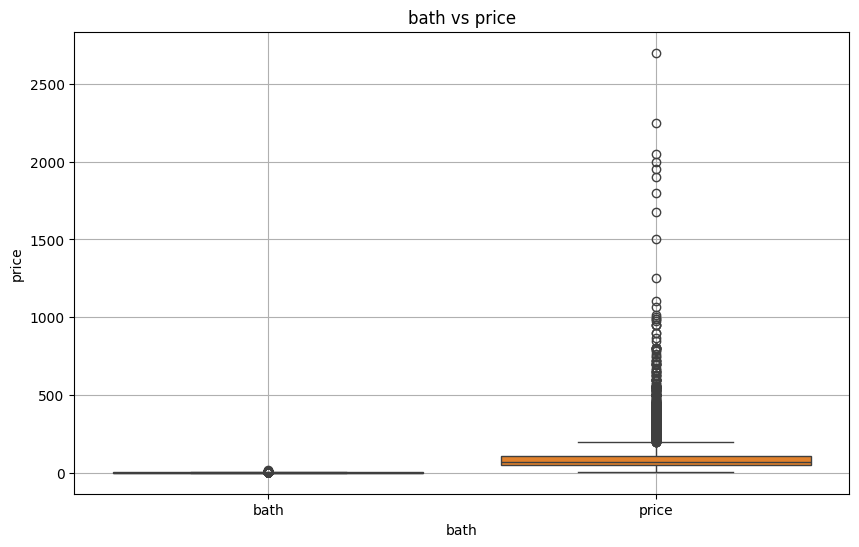

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot([df["bath"],df['price']])
plt.title('bath vs price')
plt.xlabel('bath')
plt.ylabel('price')
plt.grid(True)
plt.show()

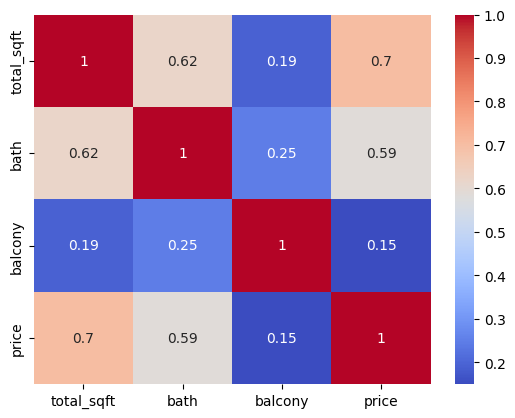

In [ ]:
numeric_df = df[["total_sqft","bath","balcony","price"]]
kjm=numeric_df.corr()
sns.heatmap(kjm,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
df.to_csv("filtered_house_price.csv",index=False)

In [8]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Amazon_electronics.csv'
df = pd.read_csv(path)
df.shape
df.info()

MessageError: Error: credential propagation was unsuccessful

In [7]:
df.head()
df.tail()
df.shape

df["category"]

NameError: name 'df' is not defined